In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
df = pd.read_csv(r'C:\Users\r_nem\OneDrive\Desktop\rucha_activity\Datasets\spam\spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [13]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


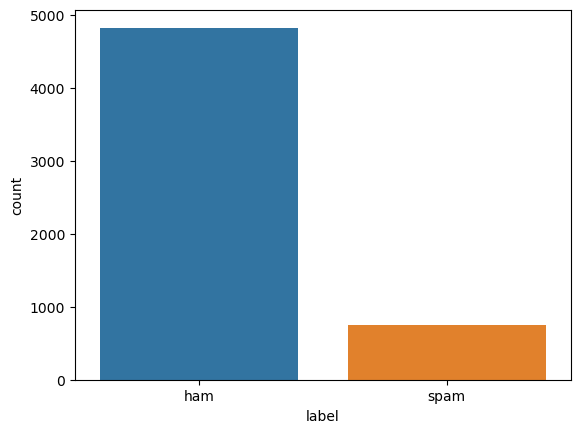

In [16]:
sns.countplot(x=df['label'])
plt.show()

In [17]:
# Find average number of tokens in all sentences

avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

15


In [21]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
    for word in sent.split():
     s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [47]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split
 
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(new_df['Text'], new_df['label'], test_size=0.2, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
 
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)
 
nb = MultinomialNB()
nb.fit(X_train_vec,y_train)

MultinomialNB()

In [51]:
accuracy_score(y_test, nb.predict(X_test_vec), normalize=True)

0.9605381165919282

In [52]:
print(classification_report(y_test, nb.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb.predict(X_test_vec))
print(cm)

[[966   0]
 [ 44 105]]


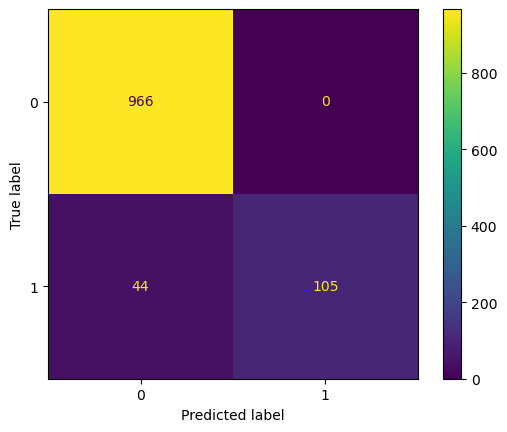

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [58]:
from tensorflow.keras.layers import TextVectorization
 
MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len
 
text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [63]:
sample_sentence = 'This is a message'
text_vec([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 40,   9,   5, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [64]:
embedding_layer = layers.Embedding(input_dim=MAXTOKENS,output_dim=128,embeddings_initializer='uniform',input_length=OUTPUTLEN)

In [65]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)
 
model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [68]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128

In [73]:
train_1 = model_1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 6s 20ms/step - loss: 0.6075 - accuracy: 0.9147 - val_loss: 0.5761 - val_accuracy: 0.9713
Epoch 2/5
140/140 [==============================] - 2s 17ms/step - loss: 0.5705 - accuracy: 0.9859 - val_loss: 0.5726 - val_accuracy: 0.9803
Epoch 3/5
140/140 [==============================] - 2s 17ms/step - loss: 0.5662 - accuracy: 0.9942 - val_loss: 0.5718 - val_accuracy: 0.9848
Epoch 4/5
140/140 [==============================] - 2s 17ms/step - loss: 0.5646 - accuracy: 0.9971 - val_loss: 0.5717 - val_accuracy: 0.9821
Epoch 5/5
140/140 [==============================] - 2s 17ms/step - loss: 0.5638 - accuracy: 0.9982 - val_loss: 0.5719 - val_accuracy: 0.9821


<Axes: >

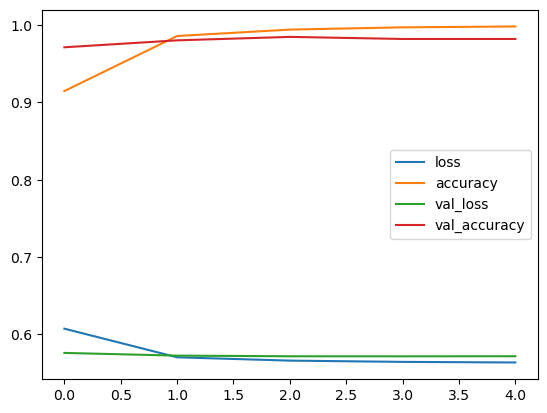

In [74]:
pd.DataFrame(train_1.history).plot()

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score
 
def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['precision'])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['recall'])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['f1'])
 
def fit_model(model, epochs, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test):
    '''
    fit the model with given epochs, train
    and test data
    '''
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2*len(X_test)))
    return history
 
def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy,
    precision, recall and f1-score
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
 
    model_results_dict = {'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                      'f1-score': f1}
    return model_results_dict

In [124]:
print('The Accuracy score is: ',accuracy)

The Accuracy score is:  0.9605381165919282


In [104]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)
 
compile_model(model_2)  # compile the model
train_2 = fit_model(model_2, epochs=5)  # fit the model

Epoch 1/5
140/140 [==============================] - 16s 59ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.1239 - val_accuracy: 0.9758
Epoch 2/5
140/140 [==============================] - 7s 47ms/step - loss: 3.9795e-04 - accuracy: 0.9998 - val_loss: 0.1170 - val_accuracy: 0.9785
Epoch 3/5
140/140 [==============================] - 7s 47ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.1681 - val_accuracy: 0.9731
Epoch 4/5
140/140 [==============================] - 7s 47ms/step - loss: 4.4689e-04 - accuracy: 0.9998 - val_loss: 0.1595 - val_accuracy: 0.9776
Epoch 5/5
140/140 [==============================] - 7s 50ms/step - loss: 1.6632e-05 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 0.9776


<Axes: >

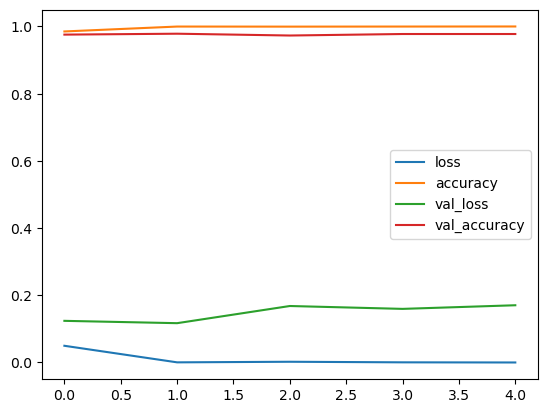

In [105]:
pd.DataFrame(train_2.history).plot()

In [108]:
import tensorflow_hub as hub
 
# model with Sequential api
model_3 = keras.Sequential()
 
# universal-sentence-encoder layer
# directly from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                           trainable=False,
                           input_shape=[],
                           dtype=tf.string,
                           name='USE')
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation=keras.activations.relu))
model_3.add(layers.Dense(1, activation=keras.activations.sigmoid))
 
compile_model(model_3)
 
train_3 = fit_model(model_3, epochs=5)

Epoch 1/5
140/140 [==============================] - 5s 17ms/step - loss: 0.2793 - accuracy: 0.9208 - val_loss: 0.1105 - val_accuracy: 0.9704
Epoch 2/5
140/140 [==============================] - 2s 13ms/step - loss: 0.0779 - accuracy: 0.9787 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 3/5
140/140 [==============================] - 2s 13ms/step - loss: 0.0542 - accuracy: 0.9818 - val_loss: 0.0598 - val_accuracy: 0.9830
Epoch 4/5
140/140 [==============================] - 2s 13ms/step - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.0572 - val_accuracy: 0.9839
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0542 - val_accuracy: 0.9839


In [109]:
nb_results = evaluate_model(nb, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)
 
total_results = pd.DataFrame({'MultinomialNB Model':nb_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()
 
total_results

35/35 [==============================] - 1s 7ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.960538,1.000000,0.704698,0.826772
Custom-Vec-Embedding Model,0.978475,0.977099,0.859060,0.914286
Bidirectional-LSTM Model,0.977578,0.969697,0.859060,0.911032
USE-Transfer learning Model,0.983857,0.951724,0.926174,0.938776


<Axes: >

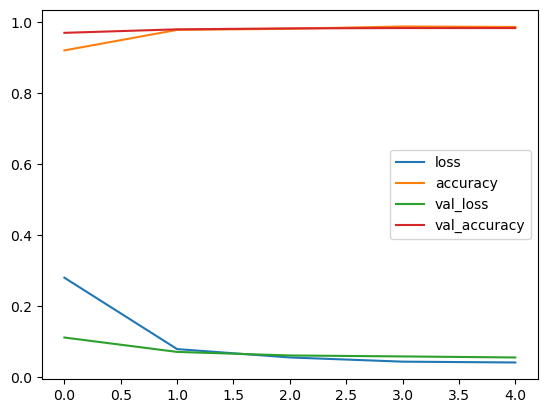

In [110]:
pd.DataFrame(train_3.history).plot()

<Axes: >

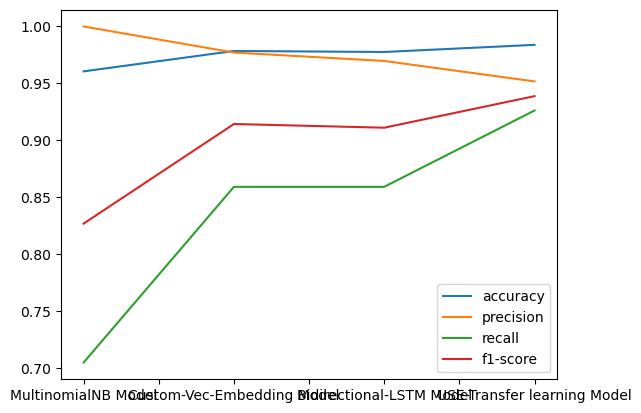

In [112]:
pd.DataFrame(total_results).plot()